In [1]:
import numpy as np
import os
import pandas as pd
import dill
from datetime import timedelta
from dateutil.parser import parser
import sys
import os
f = 'csv_pkl_sql.py'
for path, dirs, files in os.walk(os.path.expanduser('~/')):    
    if f in files:
        dir_ = path
        break
os.chdir(dir_)
try:
    from csv_pkl_sql import save_it, csv_it, pkl_it
except: 
    print("Change to the project directory")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
with open('./pkl/11_features_engineered.pkl', 'rb') as fh:
    features = dill.load(fh) #Load features
features.head(3).T

,0,1,2
date,2015-11-28 00:00:00,2015-12-05 00:00:00,2015-12-09 00:00:00
max_temp,94,93,92
max_temp1,94,94,93
max_temp2,94,94,35
location,Mexico-Guerrero,Mexico-Guerrero,Mexico-Guerrero
mean_temp,84,82,82
mean_temp1,84,84,82
mean_temp2,84,84,29
min_temp,73,72,72
min_temp1,75,73,72


In [3]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import auc, accuracy_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import RobustScaler
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
scaler = Normalizer()
#scaler = StandardScaler() 
smote_etomek=SMOTETomek(ratio='auto')
smote_enn = SMOTEENN(ratio='auto',random_state=0)
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import PCA
cachedir = mkdtemp()
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [4]:
for col in features.columns:
    if col not in ['date', 'location']:
        features[col] = features[col].astype(np.float)

In [5]:
feat_cols = [x for x in features.columns if x not in ['date','location']]
features

,date,max_temp,max_temp1,max_temp2,location,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
0,2015-11-28,94.0,94.0,94.0,Mexico-Guerrero,84.0,84.0,84.0,73.0,75.0,...,0.00,4.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
1,2015-12-05,93.0,94.0,94.0,Mexico-Guerrero,82.0,84.0,84.0,72.0,73.0,...,0.00,4.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
2,2015-12-09,92.0,93.0,35.0,Mexico-Guerrero,82.0,82.0,29.0,72.0,72.0,...,30.99,4.0,4.0,6.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
3,2015-12-12,92.0,93.0,94.0,Mexico-Guerrero,82.0,82.0,84.0,72.0,72.0,...,1.22,4.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
4,2015-12-16,32.0,92.0,93.0,Mexico-Guerrero,28.0,82.0,82.0,23.0,72.0,...,0.00,7.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
5,2015-12-19,90.0,92.0,93.0,Mexico-Guerrero,82.0,82.0,82.0,74.0,72.0,...,0.00,4.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
6,2015-12-23,33.0,32.0,92.0,Mexico-Guerrero,28.0,28.0,82.0,23.0,23.0,...,0.00,8.0,7.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
7,2015-12-26,90.0,90.0,92.0,Mexico-Guerrero,82.0,82.0,82.0,74.0,74.0,...,0.00,5.0,4.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
8,2015-12-27,94.0,90.0,90.0,Mexico-Guerrero,83.0,82.0,82.0,71.0,74.0,...,0.25,4.0,5.0,4.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7
9,2015-12-29,35.0,33.0,32.0,Mexico-Guerrero,28.0,28.0,28.0,22.0,23.0,...,6.35,6.0,8.0,7.0,29.285658,0.509027,0.509027,0.016628,1169.6,2270.7


In [6]:
framework_a_first = pd.read_pickle('./pkl/10_class_balancing_framework_a_first.pkl')
framework_a_max   = pd.read_pickle('./pkl/10_class_balancing_framework_a_max.pkl')

In [7]:
print (framework_a_first.shape, framework_a_first.isnull().sum().max())

fwd_a_first = pd.merge(framework_a_first, 
                       features, 
                       on=['date','location'], how='left').dropna()

print (fwd_a_first.shape, fwd_a_first.isnull().sum().max())

print (fwd_a_first.zika_bool.value_counts())

(1605, 3) 0
(1213, 27) 0
1    1004
0     209
Name: zika_bool, dtype: int64


In [8]:
print (framework_a_max.shape, framework_a_max.isnull().sum().max())

fwd_a_max = pd.merge(framework_a_max, 
                       features, 
                       on=['date','location'], how='left').dropna()

print (fwd_a_max.shape, fwd_a_max.isnull().sum().max())

print (fwd_a_max.zika_bool.value_counts())

(1605, 3) 0
(1213, 27) 0
1    1004
0     209
Name: zika_bool, dtype: int64


In [9]:
fwd_a_max.head()

,location,date,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
0,Argentina-Buenos_Aires,2016-05-22,1,15.0,13.0,15.0,12.0,11.0,13.0,10.0,...,0.00,13.0,12.0,17.0,12625.800781,0.003183,0.071514,0.008009,642.5,883.9
1,Argentina-CABA,2016-05-22,1,15.0,13.0,15.0,12.0,11.0,13.0,10.0,...,0.00,13.0,12.0,17.0,12625.800781,0.003183,0.071514,0.008009,642.5,883.9
2,Argentina-Catamarca,2016-05-07,1,23.0,18.0,24.0,17.0,13.0,18.0,12.0,...,12.95,14.0,13.0,14.0,460.153595,0.016047,92.822158,1.188750,642.5,883.9
3,Argentina-Chaco,2016-05-07,1,22.0,21.0,28.0,16.0,15.0,24.0,10.0,...,73.92,5.0,10.0,11.0,121.331650,0.001590,54.943508,3.194624,642.5,883.9
4,Argentina-Chubut,2016-03-19,1,26.0,26.0,25.0,18.0,19.0,18.0,10.0,...,3.30,15.0,17.0,15.0,37.095642,0.031922,115.001996,27.500226,642.5,883.9


In [10]:
# X = fwd_a_first[feat_cols].values
# y = fwd_a_first['zika_bool'].values
# X = fwd_a_max[feat_cols].values
# y = fwd_a_max['zika_bool'].values
fwd_a_max.head() #curated features (fwd_a_max class balance See Project description)

,location,date,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
0,Argentina-Buenos_Aires,2016-05-22,1,15.0,13.0,15.0,12.0,11.0,13.0,10.0,...,0.00,13.0,12.0,17.0,12625.800781,0.003183,0.071514,0.008009,642.5,883.9
1,Argentina-CABA,2016-05-22,1,15.0,13.0,15.0,12.0,11.0,13.0,10.0,...,0.00,13.0,12.0,17.0,12625.800781,0.003183,0.071514,0.008009,642.5,883.9
2,Argentina-Catamarca,2016-05-07,1,23.0,18.0,24.0,17.0,13.0,18.0,12.0,...,12.95,14.0,13.0,14.0,460.153595,0.016047,92.822158,1.188750,642.5,883.9
3,Argentina-Chaco,2016-05-07,1,22.0,21.0,28.0,16.0,15.0,24.0,10.0,...,73.92,5.0,10.0,11.0,121.331650,0.001590,54.943508,3.194624,642.5,883.9
4,Argentina-Chubut,2016-03-19,1,26.0,26.0,25.0,18.0,19.0,18.0,10.0,...,3.30,15.0,17.0,15.0,37.095642,0.031922,115.001996,27.500226,642.5,883.9


## Feature Importance

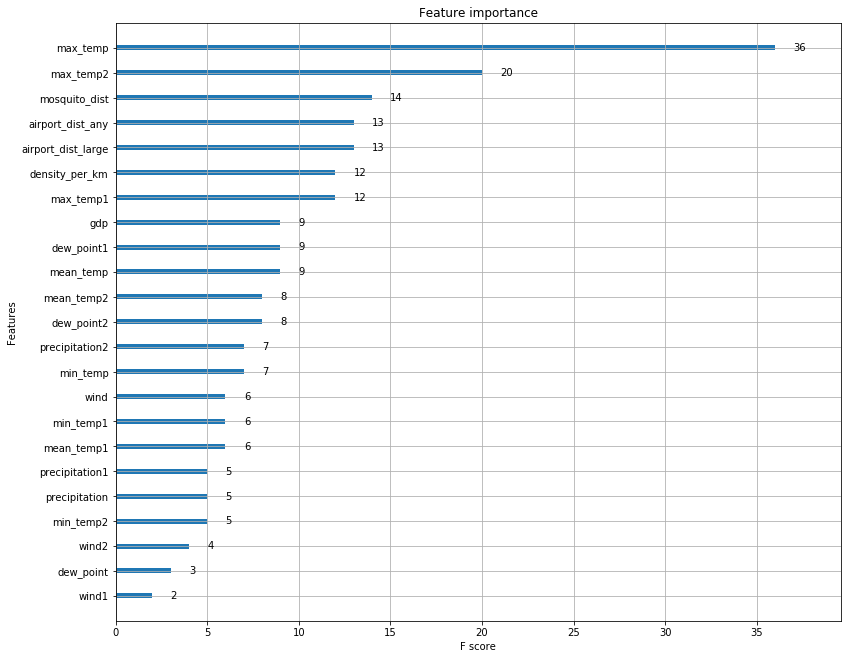

In [13]:

from xgboost import plot_importance
import xgboost as xgb
from xgboost import XGBClassifier
from matplotlib import pyplot

X = fwd_a_max[feat_cols]
y = fwd_a_max['zika_bool']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)
    

for train_index, test_index in sss.split(X.values, y.values):
        #print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xval = X.values[train_index], X.values[test_index]
    ytrain, yval = y.values[train_index], y.values[test_index]
model = XGBClassifier()
scaler = Normalizer()
smote_etomek=SMOTETomek(ratio='auto')
pipeline = Pipeline([('scaler',scaler),('smt', smote_etomek)])
# Xtrain,ytrain = pipeline.fit_sample(Xtrain,ytrain)
X_train = pd.DataFrame(data=Xtrain, columns=feat_cols)
Xval = pd.DataFrame(data=Xval, columns=feat_cols)
dtrain = xgb.DMatrix(X_train, label=ytrain)
dtrain.feature_names
model = xgb.train({'gamma': 0},dtrain)

# plot feature importance
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

my_plot_importance(model, figsize=(13,11))
pyplot.savefig(r"./feature_importance.png", format = 'png')

In [14]:
dtrain.feature_names

['max_temp',
 'max_temp1',
 'max_temp2',
 'mean_temp',
 'mean_temp1',
 'mean_temp2',
 'min_temp',
 'min_temp1',
 'min_temp2',
 'dew_point',
 'dew_point1',
 'dew_point2',
 'precipitation',
 'precipitation1',
 'precipitation2',
 'wind',
 'wind1',
 'wind2',
 'density_per_km',
 'airport_dist_any',
 'airport_dist_large',
 'mosquito_dist',
 'gdp',
 'gdp_ppp']

In [15]:
X = fwd_a_max[feat_cols].values
y = fwd_a_max['zika_bool'].values


In [16]:
X.dtype, y.dtype
y=y.astype('int32')
y = np.where(y > 0, 1, -1)
-1 in y

True

In [17]:
import collections
collections.Counter(y)

Counter({1: 1004, -1: 209})

In [18]:
from daal.data_management import HomogenNumericTable
import sys
#X = HomogenNumericTable(X, ntype = np.float64)
#y = y[:,np.newaxis]
#y = HomogenNumericTable(y, ntype= np.intc)
os.path.dirname(sys.executable)

ModuleNotFoundError: No module named 'daal'

In [62]:
# import dask, time
# import dask
X


array([[1.50000000e+01, 1.30000000e+01, 1.50000000e+01, ...,
        8.00905560e-03, 6.42500000e+02, 8.83900000e+02],
       [1.50000000e+01, 1.30000000e+01, 1.50000000e+01, ...,
        8.00905560e-03, 6.42500000e+02, 8.83900000e+02],
       [2.30000000e+01, 1.80000000e+01, 2.40000000e+01, ...,
        1.18875049e+00, 6.42500000e+02, 8.83900000e+02],
       ...,
       [3.10000000e+01, 3.10000000e+01, 2.90000000e+01, ...,
        1.26194400e+00, 1.81207000e+04, 1.81207000e+04],
       [3.10000000e+01, 3.10000000e+01, 2.90000000e+01, ...,
        1.55761620e+00, 1.81207000e+04, 1.81207000e+04],
       [3.10000000e+01, 3.10000000e+01, 2.90000000e+01, ...,
        1.11506338e+00, 1.81207000e+04, 1.81207000e+04]])

In [25]:
import os
import sys
from daal.algorithms.adaboost import prediction, training, quality_metric_set
from daal.algorithms import classifier
from daal.data_management import (FileDataSource, DataSourceIface, HomogenNumericTable,
                                  MergedNumericTable, NumericTableIface)
from utils import printNumericTables, printNumericTable

In [69]:

from sklearn.model_selection import StratifiedShuffleSplit

fam_train, fam_test = train_test_split(fwd_a_max, test_size=0.30, stratify = fwd_a_max['zika_bool'].values)

In [70]:
fam_test[fam_test['zika_bool']<=0].describe()
fam_train[fam_train['zika_bool']==0].describe()

#fam_train.describe()
os.getcwd()
save_it(fam_test,"fam_test")
save_it(fam_train,"fam_train")

In [74]:
df1=pd.DataFraam_test

,location,date,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
5,Argentina-Cordoba,2016-05-22,1,17.00,14.00,17.00,11.00,10.00,14.00,5.00,...,7.1100,8.00,8.00,5.00,2404.108887,0.009602,43.526915,0.000480,642.5,883.9
609,Colombia-Cordoba-San_Jose_De_Ure,2016-06-04,1,87.68,88.52,79.72,79.64,82.00,72.68,71.76,...,0.0756,8.00,8.84,9.16,32.199776,0.146736,11.448838,0.968325,291.5,666.9
1129,Colombia-Sucre-Toluviejo,2016-06-18,1,33.00,33.00,32.00,28.00,28.00,28.00,23.00,...,29.2100,1.00,1.00,2.00,67.596573,0.037814,15.699881,0.707361,291.5,666.9
20,Argentina-Santa_Fe,2016-05-07,1,19.00,17.00,22.00,15.00,13.00,18.00,11.00,...,44.9500,8.00,15.00,12.00,208.092285,0.023428,14.983910,0.742703,642.5,883.9
1429,Ecuador-Los_Rios-Jaramijo,2016-05-25,1,89.00,87.00,87.00,82.00,81.00,80.00,74.00,...,0.0000,6.00,6.00,5.00,221.937378,0.001741,4.092887,6.513707,99.3,184.8
610,Colombia-Cordoba-San_Pelayo,2016-03-19,1,35.00,36.00,35.00,30.00,30.00,29.00,25.00,...,0.0000,5.00,4.00,6.00,108.661255,0.018464,12.587172,1.536243,291.5,666.9
1637,Panama-Metro-Calidonia,2016-04-11,1,34.00,34.00,34.00,29.00,29.00,29.00,25.00,...,0.0000,10.00,12.00,11.00,16169.605469,0.000441,0.033023,8.627815,54.3,91.1
46,Brazil-Rio_de_Janeiro,2016-05-28,1,77.00,80.00,27.00,73.00,75.00,24.00,68.00,...,0.0000,5.00,5.00,8.00,1505.105469,0.000108,0.014630,0.012919,1799.7,3224.4
280,Colombia-Bolivar-San_Pablo,2016-04-09,1,34.00,32.00,35.00,29.00,28.00,30.00,24.00,...,0.2500,5.00,4.00,4.00,26.240145,0.219728,7.755229,0.185934,291.5,666.9
1594,Nicaragua-Masaya-Nindiri,2016-02-12,1,33.00,34.00,33.00,27.00,28.00,28.00,22.00,...,0.0000,18.00,15.00,14.00,387.784698,0.021393,10.679887,0.068208,12.7,32.1


In [72]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
y_train

TRAIN: [ 695  764  393  773   14  226    3 1052   11  490 1200  276   60  507
   77  241 1195  977  845  310   35  416 1109 1149  193 1032  146   80
 1014 1131 1059  597  619  219  843  495  236  383   82  403 1020  758
 1127  622   34 1177 1049  405 1077  728  627  963  373  945  930  541
  389  249  922  967  616 1203  161  362  729 1114  306  117  726  330
  255   32 1015  474  234 1098 1166  687  442  672  670  575  287  142
  388  873  903  266 1152  273  467  626  940  171  571   76  567  305
  738  381  355 1188  178  182  353  479 1187  982 1159  410   17  113
  105  303 1208 1016  282   99 1087  529  256  497 1057  688    9 1205
  662 1108   88 1013  808  525 1042 1137 1006   68  949  734  955  787
  819 1046  217  902 1036  326  730   53  196  828  128   39  714   28
   92  398 1043 1176  503  800  325  418 1180   97  172  278  221  723
  934   23 1027  997  700   87 1073  970  549  686  492  958 1193 1158
   67   15  981  647   66  935  476  208  140  584  554 1167 1061  660

array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [73]:
df1 = pd.DataFrame(np.column_stack((X_train,y_train)))
df2 = pd.DataFrame(np.column_stack((X_test,y_test)))
df1.to_csv('./csv/fam_train_unlabelled.csv',header=None, index=None)
df2.to_csv('./csv/fam_test_unlabeleed.csv',header=None, index=None)
#X_train.shape
df1.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,82.0,84.0,85.0,74.0,75.0,75.0,66.0,66.0,66.0,68.0,...,4.0,5.0,5.0,112.532761,0.446300,5.957206,0.372145,291.5,666.9,-1.0
1,31.0,29.0,28.0,25.0,25.0,23.0,20.0,20.0,19.0,18.0,...,11.0,9.0,7.0,69.729340,0.045742,0.901387,0.190968,291.5,666.9,1.0
2,23.0,21.0,22.0,15.0,16.0,16.0,8.0,11.0,9.0,8.0,...,10.0,9.0,9.0,61.961617,0.077390,0.077390,0.215525,291.5,666.9,1.0
3,92.0,32.0,33.0,83.0,28.0,28.0,74.0,23.0,23.0,65.0,...,6.0,10.0,7.0,11.319407,0.486850,3.723189,0.711255,291.5,666.9,1.0
4,19.0,20.0,26.0,14.0,14.0,19.0,8.0,8.0,12.0,9.0,...,8.0,7.0,4.0,64.008926,0.009380,107.745369,0.000087,642.5,883.9,1.0


In [75]:
import os
import sys
# Input data set parameters
trainDatasetFileName = "./csv/fam_train_unlabelled.csv.csv"
testDatasetFileName = "./csv/fam_test_unlabeleed.csv.csv"


from daal.data_management import (
    HomogenNumericTable, MergedNumericTable, BlockDescriptor, readWrite, readOnly
)
from daal.algorithms.adaboost import prediction, training
#from daal.algorithms.svm import prediction, training
#from daal.algorithms.brownboost import prediction, training
from daal.algorithms import classifier
from daal.data_management import (
    FileDataSource, DataSourceIface, HomogenNumericTable, MergedNumericTable, NumericTableIface, 
)
import os
import sys
from daal.algorithms.classifier.quality_metric import binary_confusion_matrix
from daal.algorithms import svm
from daal.algorithms import classifier
from daal.data_management import (
    DataSourceIface, FileDataSource, readOnly, BlockDescriptor,
    HomogenNumericTable, NumericTableIface, MergedNumericTable
)
from utils import printNumericTables, printNumericTable
nFeatures = 24
trainingResult = None
predictionResult = None
groundTruthLabels = None
trainingResult = None
predictionResult = None
AUC = []

def crossValidation(X_train, y_train):
    scaler = Normalizer()
    smote_etomek=SMOTETomek(ratio='auto')
    #smote_enn = SMOTEENN(ratio='auto')
    pipeline = Pipeline([('scaler',scaler),('smt', smote_etomek)])
    pipeline_ = Pipeline([('scaler',scaler)])
    for train, test in cv.split(X_train, y_train):
        Xtrain,ytrain = pipeline.fit_sample(X_train[train],y_train[train])
        Xtest = pipeline_.fit_transform(X_train[test])
        ytest = y_train[test]
        #print(X_train, y_train)
        

        def trainModel():
            global trainingResult

            # Initialize FileDataSource<CSVFeatureManager> to retrieve the input data from a .csv file
            trainDataSource = HomogenNumericTable(np.column_stack((Xtrain,ytrain)))

            # Create Numeric Tables for training data and labels
            trainData = HomogenNumericTable(Xtrain)
            trainGroundTruth = HomogenNumericTable(ytrain[:,np.newaxis])
            mergedData = MergedNumericTable(trainData, trainGroundTruth)

            # Retrieve the data from the input file
            block = BlockDescriptor()

            # Read one row from merged numeric table
            mergedData.getBlockOfRows(0, Xtrain.shape[0], readWrite, block)
            # Create an algorithm object to train the AdaBoost model
            algorithm = training.Batch()
            
            # Pass the training data set and dependent values to the algorithm
            algorithm.input.set(classifier.training.data, trainData)
            algorithm.input.set(classifier.training.labels, trainGroundTruth)

            # Train the AdaBoost model and retrieve the results of the training algorithm
            trainingResult = algorithm.compute()
#         print(Xtest,ytest)

        
        def testModel():
            global predictionResult, groundTruthLabels

            # Initialize FileDataSource<CSVFeatureManager> to retrieve the test data from a .csv file
            testDataSource = HomogenNumericTable(np.column_stack((Xtest,ytest)))

            # Create Numeric Tables for testing data and labels
            testData = HomogenNumericTable(Xtest)
            groundTruthLabels = HomogenNumericTable(ytest[:,np.newaxis])
            mergedData = MergedNumericTable(testData, groundTruthLabels)
            
            block = BlockDescriptor()

            # Read one row from merged numeric table
            mergedData.getBlockOfRows(0, Xtest.shape[0], readWrite, block)

            # Retrieve the data from input file
            

            # Create algorithm objects for AdaBoost prediction with the default method
            algorithm = prediction.Batch()
            # Pass the testing data set and trained model to the algorithm
            algorithm.input.setTable(classifier.prediction.data,  testData)
            algorithm.input.setModel(classifier.prediction.model, trainingResult.get(classifier.training.model))

            # Compute prediction results and retrieve algorithm results
            # (Result class from classifier.prediction)
            predictionResult = algorithm.compute()
        def testModelQuality():
            global predictedLabels, qualityMetricSetResult, groundTruthLabels

            # Retrieve predicted labels
            predictedLabels = predictionResult.get(classifier.prediction.prediction)

            # Create a quality metric set object to compute quality metrics of the SVM algorithm
            qualityMetricSet = svm.quality_metric_set.Batch()

            input = qualityMetricSet.getInputDataCollection().getInput(svm.quality_metric_set.confusionMatrix)

            input.set(binary_confusion_matrix.predictedLabels,   predictedLabels)
            input.set(binary_confusion_matrix.groundTruthLabels, groundTruthLabels)

            # Compute quality metrics and get the quality metrics
            # returns ResultCollection class from svm.quality_metric_set
            qualityMetricSetResult = qualityMetricSet.compute()


        def printResults():

            # Print the classification results
            printNumericTables(
                groundTruthLabels, predictedLabels,
                "Ground truth", "Classification results",
                "ADABOOST (first 20 observations):", 20, interval=15, flt64=False
            )

            # Print the quality metrics
            qualityMetricResult = qualityMetricSetResult.getResult(svm.quality_metric_set.confusionMatrix)
            printNumericTable(qualityMetricResult.get(binary_confusion_matrix.confusionMatrix), "Confusion matrix:")

            block = BlockDescriptor()
            qualityMetricsTable = qualityMetricResult.get(binary_confusion_matrix.binaryMetrics)
            qualityMetricsTable.getBlockOfRows(0, 1, readOnly, block)
            qualityMetricsData = block.getArray().flatten()
            print("Accuracy:      {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.accuracy]))
            print("Precision:     {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.precision]))
            print("Recall:        {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.recall]))
            print("F-score:       {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.fscore]))
            print("Specificity:   {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.specificity]))
            print("AUC:           {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.AUC]))
            AUC.append(qualityMetricsData[binary_confusion_matrix.AUC])
            qualityMetricsTable.releaseBlockOfRows(block)

        trainModel()
        #print(trainingResult)
        testModel()
        testModelQuality()
        printResults()
crossValidation(X_train,y_train)        

ADABOOST (first 20 observations):
Ground truth   Classification results
1              1              
1              1              
-1             -1             
1              1              
1              1              
-1             1              
1              1              
1              1              
1              -1             
1              -1             
1              1              
1              1              
1              1              
1              1              
-1             1              
-1             -1             
1              1              
-1             -1             
-1             -1             
1              1              

Confusion matrix:
132.000   9.000     
11.000    19.000    

Accuracy:      0.883
Precision:     0.923
Recall:        0.936
F-score:       0.930
Specificity:   0.633
AUC:           0.785
ADABOOST (first 20 observations):
Ground truth   Classification results
1              1              
1              1 

In [77]:
import sys
import os
# sys.path.append(r'..')
# sys.path.append(os.path.join(os.path.dirname(sys.executable),'share','pydaal_examples','examples','python','source'))
import numpy as np
from SVM import BinarySVM
from daal.data_management import HomogenNumericTable
from utils import printNumericTables, printNumericTable
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Create train and test datasets
# data = load_breast_cancer()
# x = data.data
# y = data.target
# y[y==0]=-1 # DAAL's SVM binary classifier labels must be -1 and 1
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
trainData = HomogenNumericTable(X_train)
testData=HomogenNumericTable(X_test)
nD_y_train= y_train[:,np.newaxis]
trainDependentVariables= HomogenNumericTable(nD_y_train)
nD_y_test = y_test[:,np.newaxis]
testGroundTruth = HomogenNumericTable(nD_y_test)


daal_svm = BinarySVM(cacheSize=6000000)
#Train
trainingResult = daal_svm.training(trainData,trainDependentVariables)
#Predict
predictResults = daal_svm.predict(trainingResult,testData)
#Evaluate you model
qualityMet = daal_svm.qualityMetrics(predictResults,testGroundTruth)
#print accuracy
print(qualityMet.get('accuracy'))
#print confusion matrix
printNumericTable(qualityMet.get('confusionMatrix'))
#print all metrics
daal_svm.printAllQualityMetrics(qualityMet)
#Serialize
daal_svm.serialize(trainingResult, fileName='svm', useCompression=True)
#Deserialize
dese_trainingRes = daal_svm.deserialize(fileName='svm.npy', useCompression=True)

#Print predicted responses and actual responses
printNumericTables (
	testGroundTruth, predictResults,
	"Ground truth", "Classification results",
	"SVM classification results (first 20 observations):", 20,  flt64=False
)

0.760989010989011

239.000   62.000    
25.000    38.000    

Confusion matrix:
239.000   62.000    
25.000    38.000    

Accuracy:      0.761
Precision:     0.905
Recall:        0.794
F1-score:      0.846
Specificity:   0.603
AUC:           0.699
SVM classification results (first 20 observations):
Ground truth   Classification results
1              5              
1              2              
1              3              
1              5              
1              -2             
1              2              
1              -1             
1              1              
1              5              
1              1              
1              2              
1              -0             
-1             -1             
1              1              
-1             -4             
-1             -1             
1              3              
1              1              
1              -2             
1              -0             



In [79]:
#BrownBoost

import os
import sys

from daal.algorithms.brownboost import prediction, training
from daal.algorithms import classifier
from daal.data_management import (
    FileDataSource, DataSourceIface, NumericTableIface, HomogenNumericTable, MergedNumericTable
)

# utils_folder = os.path.realpath(os.path.abspath(os.path.dirname(os.path.dirname(__file__))))
# if utils_folder not in sys.path:
#     sys.path.insert(0, utils_folder)
from utils import printNumericTables

DAAL_PREFIX = os.path.join('..', 'data')

# Input data set parameters
trainDatasetFileName = "./csv/fam_train_unlabelled.csv"
testDatasetFileName = "./csv/fam_test_unlabeleed.csv"
nFeatures = 24

trainingResult = None
predictionResult = None
groundTruthLabels = None


def trainModel():
    global trainingResult

    # Initialize FileDataSource<CSVFeatureManager> to retrieve the input data from a .csv file
    trainDataSource = FileDataSource(
        trainDatasetFileName,
        DataSourceIface.notAllocateNumericTable,
        DataSourceIface.doDictionaryFromContext
    )
    # Create Numeric Tables for training data and labels
    trainData = HomogenNumericTable(nFeatures, 0, NumericTableIface.doNotAllocate)
    trainGroundTruth = HomogenNumericTable(1, 0, NumericTableIface.doNotAllocate)
    mergedData = MergedNumericTable(trainData, trainGroundTruth)

    # Retrieve the data from the input file
    trainDataSource.loadDataBlock(mergedData)

    # Create an algorithm object to train the BrownBoost model
    algorithm = training.Batch()

    # Pass the training data set and dependent values to the algorithm
    algorithm.input.set(classifier.training.data, trainData)
    algorithm.input.set(classifier.training.labels, trainGroundTruth)

    # Train the BrownBoost model and retrieve the results of the training algorithm
    trainingResult = algorithm.compute()


def testModel():
    global groundTruthLabels, predictionResult

    # Initialize FileDataSource<CSVFeatureManager> to retrieve the test data from a .csv file
    testDataSource = FileDataSource(
        testDatasetFileName,
        DataSourceIface.notAllocateNumericTable,
        DataSourceIface.doDictionaryFromContext
    )

    # Create Numeric Tables for testing data and labels
    testData = HomogenNumericTable(nFeatures, 0, NumericTableIface.doNotAllocate)
    groundTruthLabels = HomogenNumericTable(1, 0, NumericTableIface.doNotAllocate)
    mergedData = MergedNumericTable(testData, groundTruthLabels)

    # Retrieve the data from input file
    testDataSource.loadDataBlock(mergedData)

    # Create algorithm objects for BrownBoost prediction with the default method
    algorithm = prediction.Batch()

    # Pass the testing data set and trained model to the algorithm
    algorithm.input.setTable(classifier.prediction.data,  testData)
    algorithm.input.setModel(classifier.prediction.model, trainingResult.get(classifier.training.model))

    # Compute prediction results and retrieve algorithm results
    # (Result class from classifier.prediction)
    predictionResult = algorithm.compute()

def testModelQuality():
    global predictedLabels, qualityMetricSetResult, groundTruthLabels

    # Retrieve predicted labels
    predictedLabels = predictionResult.get(classifier.prediction.prediction)

    # Create a quality metric set object to compute quality metrics of the SVM algorithm
    qualityMetricSet = svm.quality_metric_set.Batch()

    input = qualityMetricSet.getInputDataCollection().getInput(svm.quality_metric_set.confusionMatrix)

    input.set(binary_confusion_matrix.predictedLabels,   predictedLabels)
    input.set(binary_confusion_matrix.groundTruthLabels, groundTruthLabels)

    # Compute quality metrics and get the quality metrics
    # returns ResultCollection class from svm.quality_metric_set
    qualityMetricSetResult = qualityMetricSet.compute()


def printResults():

    # Print the classification results
    printNumericTables(
        groundTruthLabels, predictedLabels,
        "Ground truth", "Classification results",
        "ADABOOST (first 50 observations):", 50, interval=15, flt64=False
    )

    # Print the quality metrics
    qualityMetricResult = qualityMetricSetResult.getResult(svm.quality_metric_set.confusionMatrix)
    printNumericTable(qualityMetricResult.get(binary_confusion_matrix.confusionMatrix), "Confusion matrix:")

    block = BlockDescriptor()
    qualityMetricsTable = qualityMetricResult.get(binary_confusion_matrix.binaryMetrics)
    qualityMetricsTable.getBlockOfRows(0, 1, readOnly, block)
    qualityMetricsData = block.getArray().flatten()
    print("Accuracy:      {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.accuracy]))
    print("Precision:     {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.precision]))
    print("Recall:        {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.recall]))
    print("F-score:       {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.fscore]))
    print("Specificity:   {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.specificity]))
    print("AUC:           {0:.3f}".format(qualityMetricsData[binary_confusion_matrix.AUC]))
    qualityMetricsTable.releaseBlockOfRows(block)

if __name__ == "__main__":
    trainModel()
    testModel()
    testModelQuality()
    printResults()




ADABOOST (first 50 observations):
Ground truth   Classification results
1              0              
1              0              
1              1              
1              1              
1              1              
1              1              
1              1              
1              0              
-1             -1             
1              1              
1              1              
1              1              
1              0              
1              1              
-1             -1             
1              1              
1              1              
1              1              
1              1              
1              1              
-1             -1             
1              1              
1              1              
-1             0              
-1             0              
1              1              
1              1              
-1             -1             
1              1              
-1             -1            

In [81]:
import os
import sys
sys.path.append('..')
from GridSearch import GridSearch
from  daal.algorithms.svm import training, prediction
import   daal.algorithms.svm as svm
from daal.data_management import (
  FileDataSource, DataSourceIface, HomogenNumericTable, MergedNumericTable, NumericTableIface
)


#trainDatasetFileName = os.path.join(DATA_PREFIX,'svm_two_class_train_dense.csv')
trainDatasetFileName = "./csv/fam_train_unlabelled.csv"
nFeatures = 24

# Initialize FileDataSource<CSVFeatureManager> to retrieve the input data from a .csv file

trainDataSource = FileDataSource(
        trainDatasetFileName,
        DataSourceIface.notAllocateNumericTable,
        DataSourceIface.doDictionaryFromContext
    )
# Create Numeric Tables for training data and labels
trainData = HomogenNumericTable(nFeatures, 0, NumericTableIface.doNotAllocate)
trainGroundTruth = HomogenNumericTable(1, 0, NumericTableIface.doNotAllocate)
mergedData = MergedNumericTable(trainData, trainGroundTruth)

# Retrieve the data from the input file
trainDataSource.loadDataBlock(mergedData)

#default keyword arguments
'''
GridSearch(<args>, tuned_parameters = None, score=None,
			best_score_criteria='high',
			create_best_training_model = False,
			save_model=False,nClasses=None )			
'''	
#create a dictionary of hyperparameter values in a list
svm_params = [{'C':[0.5,1],
				'accuracyThreshold':[0.01,0.001],
				'cacheSize':[600000000],
				'tau':[1.0e-6,1.0e-5],
				'maxIterations':[100,10],
				'doShrinking':[True, False]}]	
#Create GridSearch object
clf = GridSearch(svm,training,prediction, 
				tuned_parameters = svm_params,score=None,
				best_score_criteria='high',
				create_best_training_model=True,
				save_model=True,nClasses=None)		
#Train on all combinations of hyperparameters
result = clf.train(trainData,trainGroundTruth)
#view all the parameters and scores in best to worst order
result.viewAllResults()
#view the best parameters with score
print(result.bestResult())





Data successfully serialized and saved as trainRes-2018-08-05_20-09-54 and trainRes-2018-08-05_20-09-54.txt
{'C': 0.5, 'accuracyThreshold': 0.001, 'cacheSize': 600000000, 'tau': 1e-06, 'maxIterations': 10, 'doShrinking': False}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.001, 'cacheSize': 600000000, 'tau': 1e-06, 'maxIterations': 10, 'doShrinking': True}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.001, 'cacheSize': 600000000, 'tau': 1e-05, 'maxIterations': 10, 'doShrinking': False}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.001, 'cacheSize': 600000000, 'tau': 1e-05, 'maxIterations': 10, 'doShrinking': True}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.01, 'cacheSize': 600000000, 'tau': 1e-06, 'maxIterations': 10, 'doShrinking': False}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.01, 'cacheSize': 600000000, 'tau': 1e-06, 'maxIterations': 10, 'doShrinking': True}: 0.734902885682575
{'C': 0.5, 'accuracyThreshold': 0.01, 'cacheSize': 600000000, '

In [82]:
import sys
sys.path.append('..')
import os
import daal.algorithms.adaboost as adaB
from daal.algorithms.adaboost import prediction, training
from GridSearch import GridSearch
from daal.data_management import (
	FileDataSource, DataSourceIface, HomogenNumericTable, MergedNumericTable, NumericTableIface
)


DATA_PREFIX = os.path.join(EXAMPLES_DIR,'data','batch')
#trainDatasetFileName = os.path.join(DATA_PREFIX, 'adaboost_train.csv')
trainDatasetFileName = "./csv/fam_train_unlabelled.csv"
nFeatures = 20

# Initialize FileDataSource<CSVFeatureManager> to retrieve the input data from a .csv file
trainDataSource = FileDataSource(
	trainDatasetFileName, DataSourceIface.notAllocateNumericTable,
	DataSourceIface.doDictionaryFromContext
)

# Create Numeric Tables for training data and labels
trainData = HomogenNumericTable(nFeatures, 0, NumericTableIface.doNotAllocate)
trainGroundTruth = HomogenNumericTable(1, 0, NumericTableIface.doNotAllocate)
mergedData = MergedNumericTable(trainData, trainGroundTruth)

# Retrieve the data from the input file
trainDataSource.loadDataBlock(mergedData)

#default keyword arguments
'''
GridSearch(<args>, tuned_parameters = None, score=None,
			best_score_criteria='high',
			create_best_training_model = False,
			save_model=False,nClasses=None )			
'''	
#create a dictionary of hyperparameter values in a list
adaB_params = [{'accuracyThreshold': [0.99,0.1],
				'maxIterations' :[1,5]}]
#Create GridSearch object						 
clf = GridSearch(adaB,training,prediction, 
				tuned_parameters = adaB_params,score=None,
				best_score_criteria='high',
				create_best_training_model=True,
				save_model=True,nClasses=5)		
#Train on all combinations of hyperparameters
result = clf.train(trainData,trainGroundTruth)
#view all the parameters and scores in best to worst order
result.viewAllResults()
#view the best parameters with score
print(result.bestResult())

Data successfully serialized and saved as trainRes-2018-08-05_20-10-58 and trainRes-2018-08-05_20-10-58.txt
{'accuracyThreshold': 0.1, 'maxIterations': 1}: 1.0
{'accuracyThreshold': 0.1, 'maxIterations': 5}: 1.0
{'accuracyThreshold': 0.99, 'maxIterations': 1}: 1.0
{'accuracyThreshold': 0.99, 'maxIterations': 5}: 1.0
{'Best Parmeters': ["{'accuracyThreshold': 0.1, 'maxIterations': 1}", "{'accuracyThreshold': 0.1, 'maxIterations': 5}", "{'accuracyThreshold': 0.99, 'maxIterations': 1}", "{'accuracyThreshold': 0.99, 'maxIterations': 5}"], 'score': 1.0}


In [83]:
result.bestParams

["{'accuracyThreshold': 0.1, 'maxIterations': 1}",
 "{'accuracyThreshold': 0.1, 'maxIterations': 5}",
 "{'accuracyThreshold': 0.99, 'maxIterations': 1}",
 "{'accuracyThreshold': 0.99, 'maxIterations': 5}"]